##**Import Dependecies and Setup**

In [ ]:
import tensorflow as tf
import os
import json
import cv2
from PIL import Image

from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np

## **Data collection**

In [3]:
!pip install kaggle
kaggle_credentials = json.load(open('kaggle-2.json'))

# enviroment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']
!kaggle datasets download -d kacpergregorowicz/house-plant-species

NameError: name 'json' is not defined

In [ ]:
# Unzip the downloaded dataset
with ZipFile("house-plant-species.zip", 'r') as zip_ref:
    zip_ref.extractall()

(1024, 819, 3)


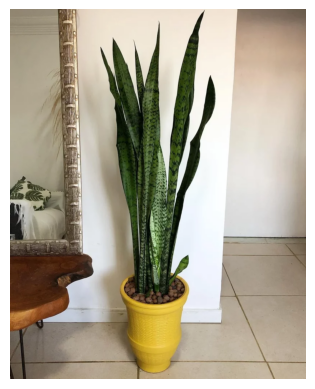

In [ ]:
# Dataset Path
import matplotlib.image as mpimg
# base_dir = 'plantvillage dataset/color'


image_path = 'house_plant_species/Snake plant (Sanseviera)/385.webp'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

# (256, 256, 3)

#**Data Cleaning**
Remove invalid images

In [ ]:
import imghdr

data_dir = 'house_plant_species'

image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list house_plant_species/Birds Nest Fern (Asplenium nidus)/258.webp
Image not in ext list house_plant_species/Money Tree (Pachira aquatica)/337.jpg
Image not in ext list house_plant_species/Money Tree (Pachira aquatica)/145.jpg
Image not in ext list house_plant_species/Money Tree (Pachira aquatica)/313.jpg
Image not in ext list house_plant_species/Dumb Cane (Dieffenbachia spp.)/392.webp
Image not in ext list house_plant_species/Dumb Cane (Dieffenbachia spp.)/474.webp
Image not in ext list house_plant_species/Dumb Cane (Dieffenbachia spp.)/273.webp
Image not in ext list house_plant_species/Dumb Cane (Dieffenbachia spp.)/16.webp
Image not in ext list house_plant_species/Dumb Cane (Dieffenbachia spp.)/408.webp
Image not in ext list house_plant_species/Dumb Cane (Dieffenbachia spp.)/227.webp
Image not in ext list house_plant_species/Dumb Cane (Dieffenbachia spp.)/103.webp
Image not in ext list house_plant_species/Dumb Cane (Dieffenbachia spp.)/267.webp
Image not in ext lis

In [ ]:
img = cv2.imread(os.path.join('house_plant_species','Aloe Vera','1.jpg'))

In [ ]:
img.shape

(2048, 1536, 3)

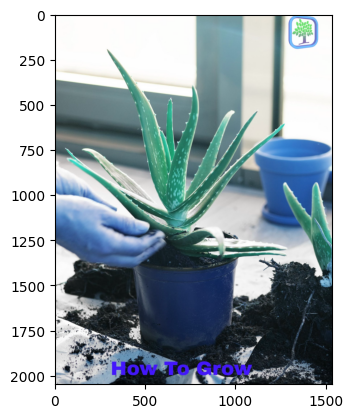

In [ ]:
plt.imshow(img)

#**Data Loading**

In [ ]:
# Data pipline
data = tf.keras.utils.image_dataset_from_directory('house_plant_species')

Found 14535 files belonging to 47 classes.


In [ ]:
class_names = data.class_names

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
print(f"{len(batch)}")

batch[0].shape

2


(32, 256, 256, 3)

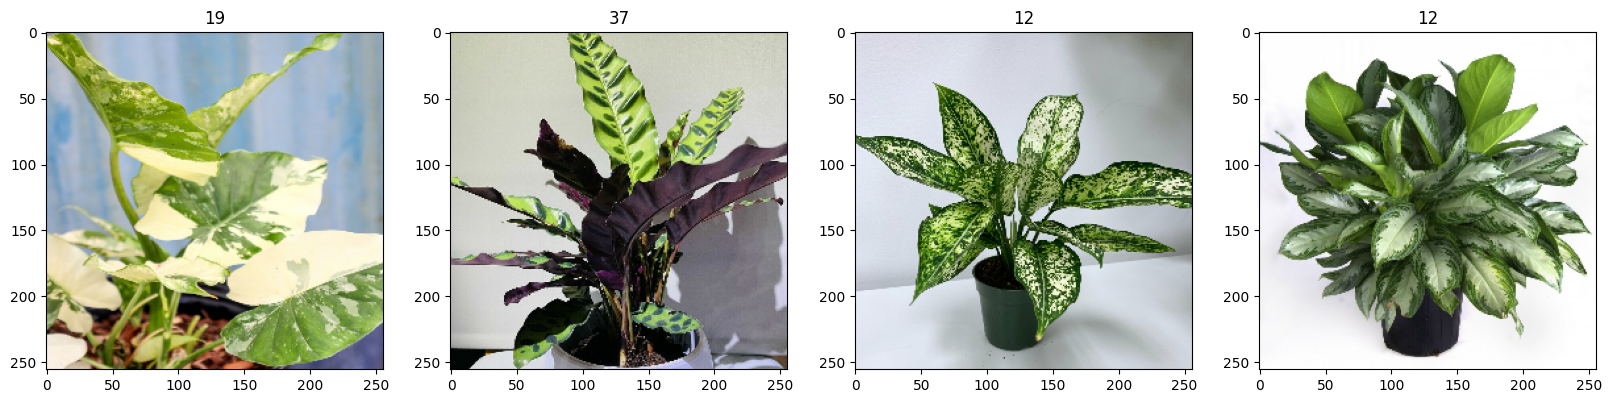

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[1]
# batch[0]--- image, batch[1]----- labels


array([19, 37, 12, 12, 30, 32, 33,  2,  5, 34, 12, 23, 30, 20, 18,  9, 26,
       40, 12, 33, 30, 41, 30, 23, 11, 27, 15, 25, 15,  7, 12, 41],
      dtype=int32)

In [ ]:
batch[0].max()

np.float32(255.0)

#**Data Preprocessing**

## Scaling

In [ ]:
# scaling
data = data.map(lambda x,y: (x/255, y))


In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

## Split Data

In [ ]:
len(data)

455

In [ ]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

455

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



```
# This is formatted as code
```

#**Model Building**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import load_model

## Using Pretrained model

In [ ]:
# using pretrained model
base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

model2 = Sequential()
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(47, activation='softmax'))


<ipython-input-28-62a5c86ab873>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Compile and Train the Model

In [ ]:
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 47)                  │          60,207 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,318,191 (8.84 MB)

 Trainable params: 60,207 (235.18 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
logdir = 'logs'

# Create the logs directory if it doesn't exist
if not os.path.exists(logdir):
    os.makedirs(logdir)


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# checkpoint callback
!mkdir -p my_models_h5
#  Save best model checkpoint
checkpoint_filepath = "my_models_h5/best_model.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,  # Save path
    save_best_only=True,# Only save the best model
    save_weights_only=False,
    monitor='val_loss',            # Monitor validation loss
                    # Save model with the lowest validation loss
    verbose=1
)


In [ ]:
#Early stopping callback
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor ="loss", patience = 5, verbose = 1
)

In [ ]:
hist = model2.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback, checkpoint_callback, early_stop_callback])

Epoch 1/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.3745 - loss: 2.5195
Epoch 1: val_loss improved from inf to 1.13382, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.3750 - loss: 2.5173 - val_accuracy: 0.7036 - val_loss: 1.1338
Epoch 2/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.7559 - loss: 0.9338
Epoch 2: val_loss improved from 1.13382 to 0.91360, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.7560 - loss: 0.9336 - val_accuracy: 0.7517 - val_loss: 0.9136
Epoch 3/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.8242 - loss: 0.6824
Epoch 3: val_loss improved from 0.91360 to 0.81233, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 356s 1s/step - accuracy: 0.8242 - loss: 0.6823 - val_accuracy: 0.7878 - val_loss: 0.8123
Epoch 4/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.8652 - loss: 0.5379
Epoch 4: val_loss improved from 0.81233 to 0.77149, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.8652 - loss: 0.5379 - val_accuracy: 0.7854 - val_loss: 0.7715
Epoch 5/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8940 - loss: 0.4476
Epoch 5: val_loss improved from 0.77149 to 0.74041, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.8940 - loss: 0.4476 - val_accuracy: 0.7926 - val_loss: 0.7404
Epoch 6/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.9194 - loss: 0.3699
Epoch 6: val_loss improved from 0.74041 to 0.71995, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.9194 - loss: 0.3699 - val_accuracy: 0.8029 - val_loss: 0.7200
Epoch 7/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9348 - loss: 0.3172
Epoch 7: val_loss improved from 0.71995 to 0.70737, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.9348 - loss: 0.3172 - val_accuracy: 0.8029 - val_loss: 0.7074
Epoch 8/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.9484 - loss: 0.2728
Epoch 8: val_loss did not improve from 0.70737
318/318 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.9484 - loss: 0.2728 - val_accuracy: 0.8029 - val_loss: 0.7175
Epoch 9/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.9576 - loss: 0.2380
Epoch 9: val_loss improved from 0.70737 to 0.69569, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.9576 - loss: 0.2380 - val_accuracy: 0.8043 - val_loss: 0.6957
Epoch 10/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9681 - loss: 0.2036
Epoch 10: val_loss improved from 0.69569 to 0.69186, saving model to my_models_h5/best_model.h5


318/318 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.9681 - loss: 0.2036 - val_accuracy: 0.8043 - val_loss: 0.6919


## Save Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save model in Drive
model2.save('/content/drive/MyDrive/best_model.h5')


Mounted at /content/drive


#**Model Evaluation**

Text(0.5, 0.98, 'Loss')

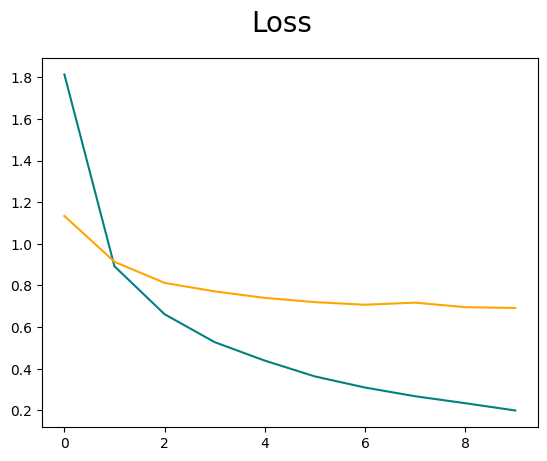

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)

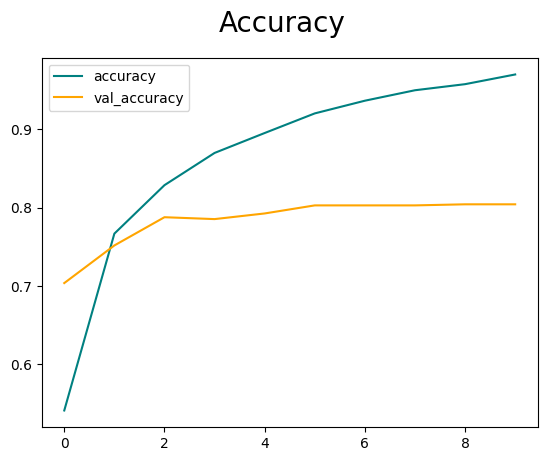

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
len(test)

46

In [ ]:
# for batch in test.as_numpy_iterator():
#   X, y = batch
#   yhat = model2.predict(X)
#   pre.update_state(y, yhat)
#   re.update_state(y, yhat)
#   acc.update_state(y, yhat)
# #


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:GPU:0}} required broadcastable shapes [Op:LogicalAnd] name: 

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

# ---------------------------------

#**Model Testing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model_path = '/content/drive/MyDrive/best_model.h5'
model = load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


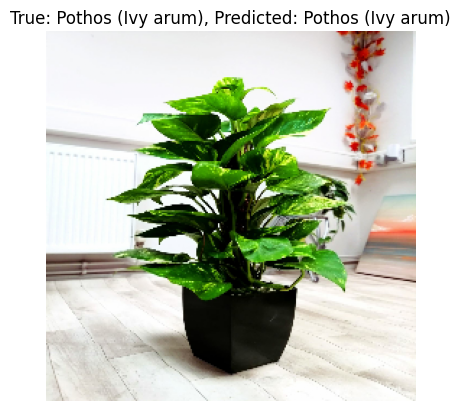

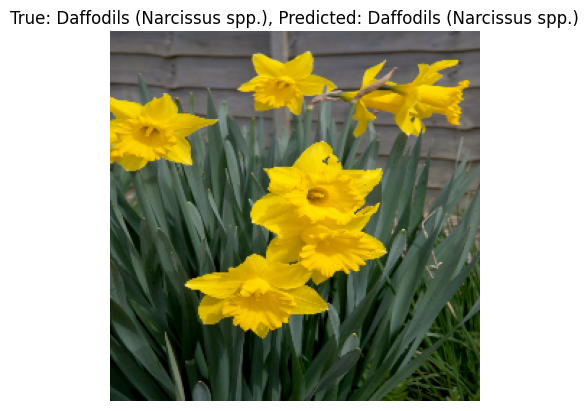

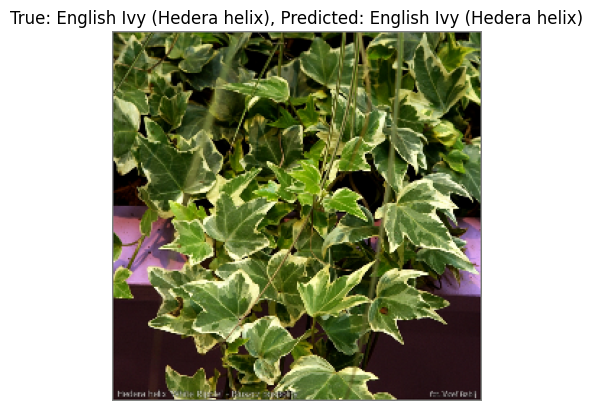

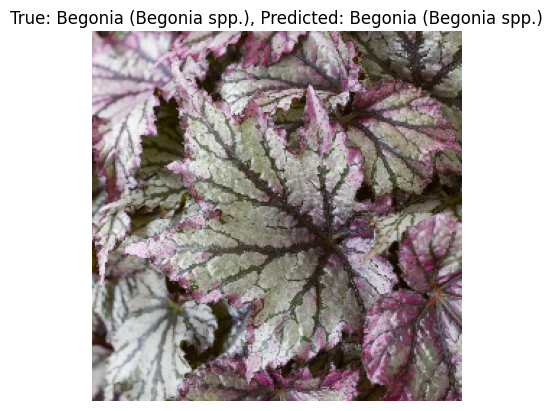

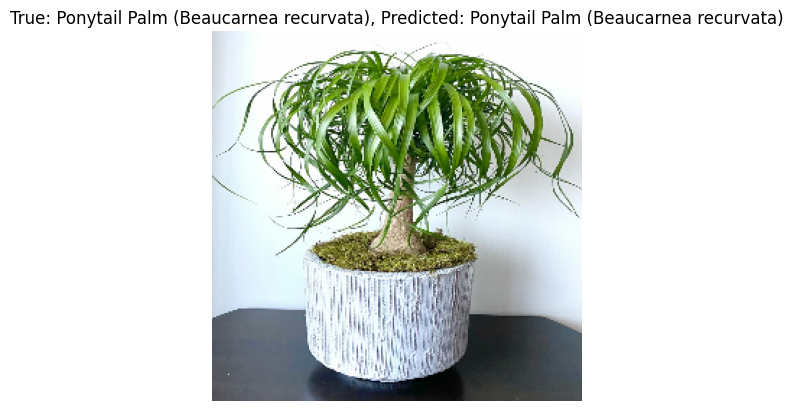

In [ ]:
# testing on test batch


for images, labels in test.take(1):
    predictions = model.predict(images)

    # Show a few predictions
    for i in range(5):
        plt.imshow(images[i].numpy())
        true_label = class_names[labels[i].numpy()]
        predicted_label = class_names[np.argmax(predictions[i])]

        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


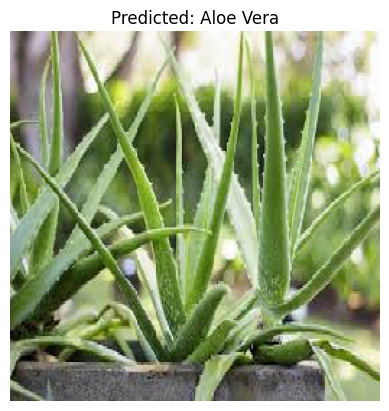

In [ ]:
# Testing on random image
img_path = 'aloevera.jpeg'


# Load and preprocess
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Show it
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()